<a href="https://colab.research.google.com/github/totti0223/P2PNet_tfkeras/blob/master/notebooks/P2PNet_colab_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quick Demo of P2PNet_keras

**This model is not fully trained yet.**

This notebook is for PoC understanding.

In [1]:
!pip install loguru >/dev/null

In [2]:
!git clone https://github.com/totti0223/P2PNet_tfkeras.git

Cloning into 'P2PNet_tfkeras'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 48 (delta 1), reused 5 (delta 1), pack-reused 38
Unpacking objects: 100% (48/48), 133.23 MiB | 11.12 MiB/s, done.


In [3]:
%cd P2PNet_tfkeras

/content/P2PNet_tfkeras


In [4]:
import os
import cv2
import tensorflow as tf
import tensorflow.keras.backend as K
import numpy as np
import matplotlib.pyplot as plt

from utils.models import P2PNet
from utils.general import pad, postprocess

In [5]:
# Restore the checkpoint file.
# Due to the github file size limit, the weights are split into 3 parts.
# In case of running in local environment, you dont have to do this but can directly load the ckpt in the following cell
!cat weights/ckpt/temp_VGG16_256_part_* > weights/ckpt/VGG16_256_860.data-00000-of-00001

In [6]:
# Load P2PModel
K.clear_session()
model = P2PNet(feature_size=256, backbone_name="vgg16", preprocessing=True)
model.load_weights("weights/ckpt/VGG16_256_860")

2023-04-27 23:38:54.160 | INFO     | utils.backbone:load_feature_extraction_model:24 - Loading model: vgg16
2023-04-27 23:38:54.162 | INFO     | utils.backbone:load_feature_extraction_model:30 - {'core': <function VGG16 at 0x7f62031fd870>, 'preprocess_input': <function preprocess_input at 0x7f62031fd990>, 'intermediate_layer_names': ['block4_conv3', 'block5_conv3']}


58889256/58889256 [==============================] - 2s 0us/step


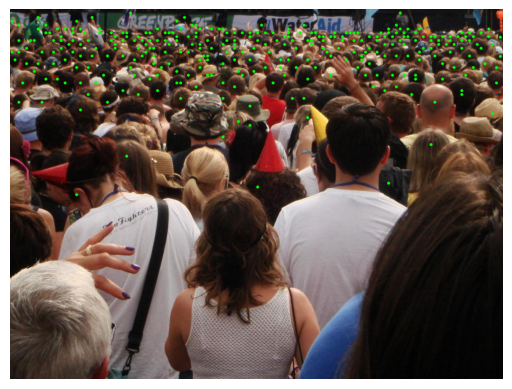

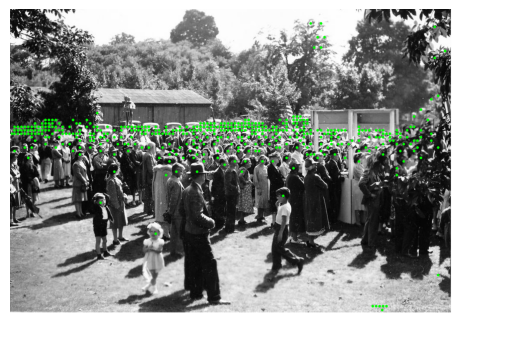

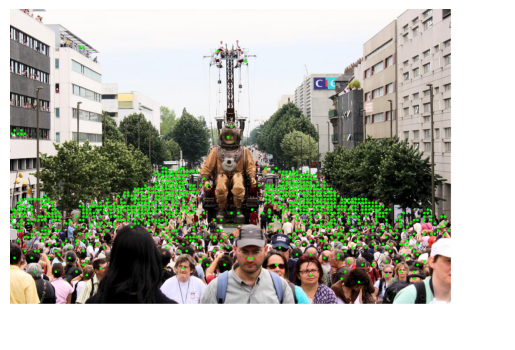

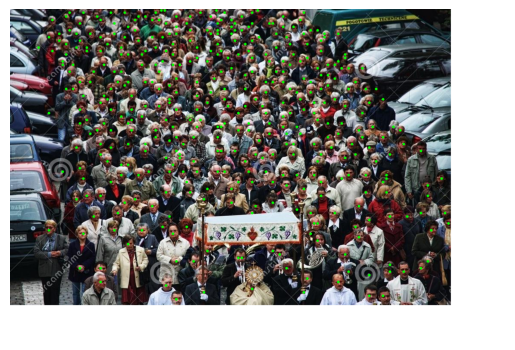

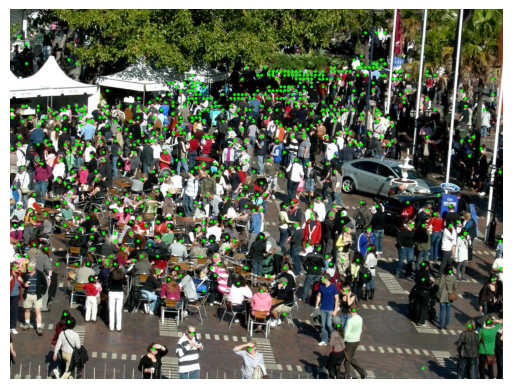

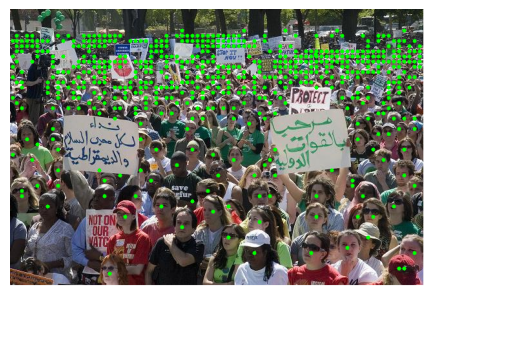

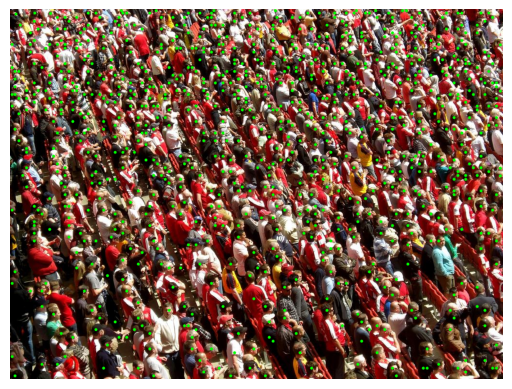

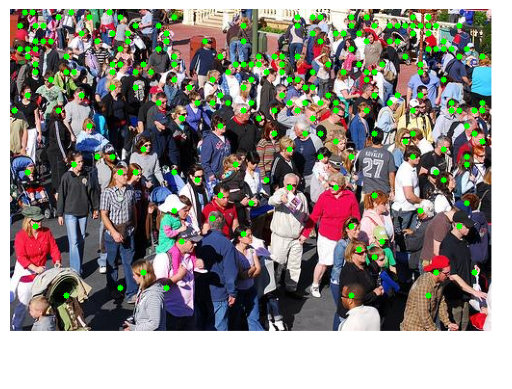

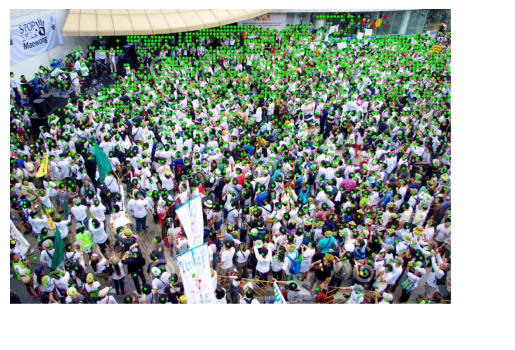

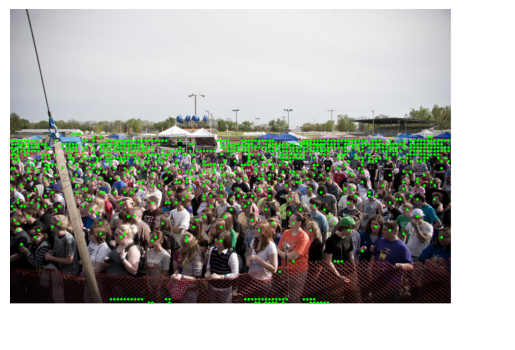

In [7]:
pardir = "./resources/shha_test_images/"
files = os.listdir(pardir)
for file in files:
    path = os.path.join(pardir, file)
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # this depends on the model
    image = pad(image)
    
    pred = model.predict(np.expand_dims(image.astype(np.float32), axis=0), verbose=0)[0]
    coords = postprocess(pred)
    for coord in coords:
        cv2.circle(image, (int(coord[0]), int(coord[1])), 3, (0, 255, 0), -1)
    plt.imshow(image)
    plt.axis("off")
    plt.show() 